In [17]:
pip install category_encoders

In [18]:
# импорты для работы с данными, для визуализации, для моделей и т.д.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.sparse import issparse

In [19]:
# загружаем данные для регрессии

# реальная практическая задача - оценка стоимости драгоценности на основе её характеристик при торговле
csv_path = "diamonds.csv"

df_reg = pd.read_csv(csv_path)
# берем случайную выборку 60% для ускорения работы программы
df_reg = df_reg.sample(frac=0.6, random_state=42)

In [20]:
# анализируем входные данные
df_reg.head()
df_reg.shape
df_reg.info()
# df_reg.describe()
df_reg.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 33553 to 35687
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    30000 non-null  float64
 1   cut      30000 non-null  object 
 2   color    30000 non-null  object 
 3   clarity  30000 non-null  object 
 4   depth    30000 non-null  float64
 5   table    30000 non-null  float64
 6   price    30000 non-null  int64  
 7   x        30000 non-null  float64
 8   y        30000 non-null  float64
 9   z        30000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.5+ MB


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [21]:
# загружаем данные для классификации

# реальная практическая задача - анализ и прогнозирование бессонницы
csv_path = "Insomniac_data.csv"

df_clf = pd.read_csv(csv_path)

In [22]:
# анализируем входные данные
df_clf.head()
df_clf.shape
df_clf.info()
df_clf.describe()
df_clf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              345 non-null    object 
 1   Total_sleep_time(hour)            420 non-null    float64
 2   Satisfaction_of_sleep             420 non-null    object 
 3   Late_night_sleep                  420 non-null    object 
 4   Wakeup_frequently_during_sleep    420 non-null    object 
 5   Sleep_at_daytime                  420 non-null    object 
 6   Drowsiness_tiredness              420 non-null    object 
 7   Duration_of_this_problems(years)  420 non-null    float64
 8   Recent_psychological_attack       420 non-null    object 
 9   Afraid_of_getting_asleep          420 non-null    object 
 10  Disorder                          420 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 36.2+ KB


,0
Name,75
Total_sleep_time(hour),0
Satisfaction_of_sleep,0
Late_night_sleep,0
Wakeup_frequently_during_sleep,0
Sleep_at_daytime,0
Drowsiness_tiredness,0
Duration_of_this_problems(years),0
Recent_psychological_attack,0
Afraid_of_getting_asleep,0


In [23]:
# подготавливаем данные

# делим признаки на числовые и категориальные
num_cols_reg = df_reg.drop(columns=["price"]).select_dtypes(include=["number"]).columns.tolist()
cat_cols_reg = df_reg.drop(columns=["price"]).select_dtypes(include=["object"]).columns.tolist()

num_cols_clf = df_clf.drop(columns=["Disorder", "Duration_of_this_problems(years)"]).select_dtypes(include=["number"]).columns.tolist()
cat_cols_clf = df_clf.drop(columns=["Disorder", "Satisfaction_of_sleep"]).select_dtypes(include=["object"]).columns.tolist()


In [24]:
# определяем признаки и таргет
X_reg = df_reg.drop(columns=["price"])
y_reg = df_reg["price"]

X_clf = df_clf.drop(columns=["Disorder", "Duration_of_this_problems(years)", "Satisfaction_of_sleep"])
y_clf = df_clf["Disorder"]

In [25]:
# определяем обучающие и тестовые выборки
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

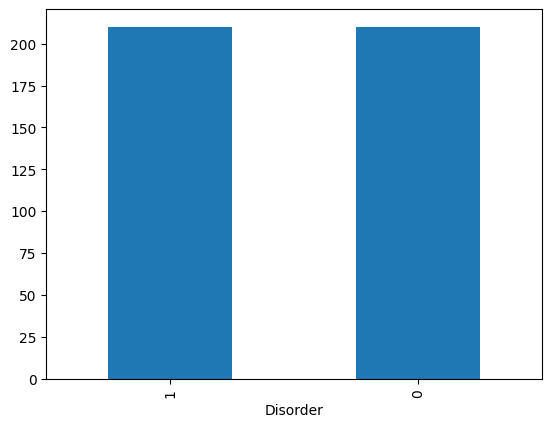

In [26]:
# смотрим изначальное распределение классов для классификации
df_clf["Disorder"].value_counts().plot(kind='bar')
plt.show()

In [27]:
# анализируем зависимость целевой переменной от признаков

for col in ['Satisfaction_of_sleep', 'Late_night_sleep', 'Wakeup_frequently_during_sleep', 'Sleep_at_daytime', 'Drowsiness_tiredness', 'Recent_psychological_attack', 'Afraid_of_getting_asleep']:
    print(f"\nпризнак: {col}")
    print(df_clf.groupby(col)['Disorder'].mean())


признак: Satisfaction_of_sleep
Satisfaction_of_sleep
No     0.804598
Yes    0.000000
Name: Disorder, dtype: float64

признак: Late_night_sleep
Late_night_sleep
No     0.165217
Yes    0.626230
Name: Disorder, dtype: float64

признак: Wakeup_frequently_during_sleep
Wakeup_frequently_during_sleep
No     0.186364
Yes    0.845000
Name: Disorder, dtype: float64

признак: Sleep_at_daytime
Sleep_at_daytime
No     0.556923
Yes    0.305263
Name: Disorder, dtype: float64

признак: Drowsiness_tiredness
Drowsiness_tiredness
No     0.183544
Yes    0.690840
Name: Disorder, dtype: float64

признак: Recent_psychological_attack
Recent_psychological_attack
No     0.389078
Yes    0.755906
Name: Disorder, dtype: float64

признак: Afraid_of_getting_asleep
Afraid_of_getting_asleep
No     0.202643
Yes    0.849741
Name: Disorder, dtype: float64


In [28]:
# обычная классификация

# препроцессинг, стандартизируем числовые признаки, применяем OneHot
preprocessor_clf = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_clf),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_clf),
    ]
)

In [29]:
# создаем и обучаем модель
clf_baseline = Pipeline([
    ("prep", preprocessor_clf),
    ("model", RandomForestClassifier(n_estimators=10, random_state=42))
])

clf_baseline.fit(Xc_train, yc_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Total_sleep_time(hour)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name', 'Late_night_sleep',
                                                   'Wakeup_frequently_during_sleep',
                                                   'Sleep_at_daytime',
                                                   'Drowsiness_tiredness',
                                                   'Recent_psychological_attack',
                                                   'Afraid_of_getting_asleep'])])),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

In [30]:
# результаты обучения
yc_pred = clf_baseline.predict(Xc_test)

acc = accuracy_score(yc_test, yc_pred)
f1 = f1_score(yc_test, yc_pred)

print(acc, f1)

0.9523809523809523 0.9555555555555556


In [31]:
# обычная регрессия

# препроцессинг, стандартизируем числовые признаки, применяем OneHot
preprocessor_reg = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_reg),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_reg),
    ]
)

In [32]:
# создаем и обучаем модель
reg_baseline = Pipeline([
    ("prep", preprocessor_reg),
    ("model", RandomForestRegressor(random_state=42))
])

reg_baseline.fit(Xr_train, yr_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [33]:
# результаты обучения
yr_pred = reg_baseline.predict(Xr_test)

mae = mean_absolute_error(yr_test, yr_pred)
rmse = np.sqrt(mean_squared_error(yr_test, yr_pred))
r2 = r2_score(yr_test, yr_pred)

print(mae, rmse, r2)

285.47643541269844 585.4576176950786 0.9781648028603389


In [34]:
# улучшенная классификация

# препроцессинг
preprocessor_clf_imp = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_clf),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_clf),
    ]
)

In [35]:
# создаем и обучаем модель
clf_pipe = Pipeline([
    ("prep", preprocessor_clf_imp),
    ("model", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

# подбираем гиперпараметры через GridSearchCV
params = {
    "model__n_estimators": [10, 20, 30],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5],
    "model__max_features": ["sqrt", "log2", None]
}

clf_grid = GridSearchCV(
    clf_pipe,
    params,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

clf_grid.fit(Xc_train, yc_train)

print("лучшие параметры:", clf_grid.best_params_)
best_clf = clf_grid.best_estimator_

лучшие параметры: {'model__max_depth': 20, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__n_estimators': 30}


0.9523809523809523 0.9555555555555556


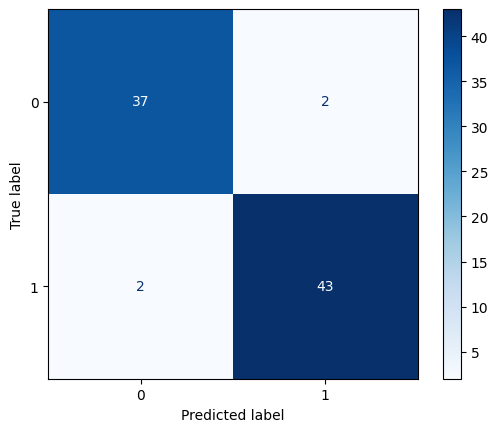

In [36]:
# результаты обучения
yc_pred_imp = best_clf.predict(Xc_test)

acc_imp = accuracy_score(yc_test, yc_pred_imp)
f1_imp = f1_score(yc_test, yc_pred_imp)

print(acc_imp, f1_imp)

ConfusionMatrixDisplay.from_predictions(
    yc_test,
    yc_pred_imp,
    cmap="Blues"
)

In [49]:
# улучшенная регрессия

# используем TargetEncoder вместо OneHot
preprocessor_reg_imp = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_reg),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_reg)
    ]
)

In [50]:
# создаем и обучаем модель
reg_pipe = Pipeline([
    ("prep", preprocessor_reg_imp),
    ("model", RandomForestRegressor(random_state=42))
])

# подбираем гиперпараметры через GridSearchCV
reg_grid = GridSearchCV(
    reg_pipe,
    params,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

reg_grid.fit(Xr_train, yr_train)

print("лучшие параметры:", reg_grid.best_params_)
best_reg = reg_grid.best_estimator_

лучшие параметры: {'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__n_estimators': 30}


287.2427961972904 587.359540424006 0.978022704399312


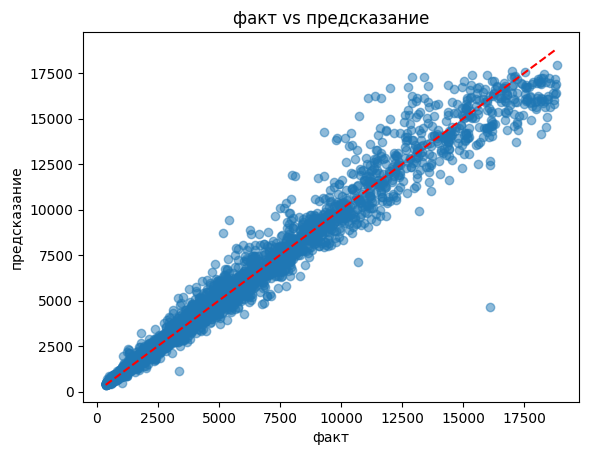

In [78]:
# результаты обучения
yr_pred_imp = best_reg.predict(Xr_test)

mae_imp = mean_absolute_error(yr_test, yr_pred_imp)
rmse_imp = np.sqrt(mean_squared_error(yr_test, yr_pred_imp))
r2_imp = r2_score(yr_test, yr_pred_imp)

print(mae_imp, rmse_imp, r2_imp)

plt.scatter(yr_test, yr_pred_imp, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()],
         [yr_test.min(), yr_test.max()],
         linestyle="--", color="red")
plt.xlabel("факт")
plt.ylabel("предсказание")
plt.title("факт vs предсказание")
plt.show()

In [77]:
# своя классификация

class MyDecisionTreeClf:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        if hasattr(X, "toarray"):
            X = X.toarray()
        X = np.array(X)
        y = np.array(y)
        self.tree = self.build_tree(X, y, 0)
        return self

    def majority_class(self, y):
        return np.bincount(y.astype(int)).argmax()

    def best_split(self, X, y):
        best_feature, best_value, best_score = None, None, 1e9
        for feat in range(X.shape[1]):
            values = np.unique(X[:, feat])
            for v in values:
                left = y[X[:, feat] <= v]
                right = y[X[:, feat] > v]
                if len(left) == 0 or len(right) == 0:
                    continue
                score = len(left) * np.var(left) + len(right) * np.var(right)
                if score < best_score:
                    best_feature, best_value, best_score = feat, v, score
        return best_feature, best_value

    def build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return {"leaf": True, "value": self.majority_class(y)}

        feat, val = self.best_split(X, y)
        if feat is None:
            return {"leaf": True, "value": self.majority_class(y)}

        left_mask = X[:, feat] <= val
        return {
            "leaf": False,
            "feature": feat,
            "value": val,
            "left": self.build_tree(X[left_mask], y[left_mask], depth + 1),
            "right": self.build_tree(X[~left_mask], y[~left_mask], depth + 1)
        }

    def predict_one(self, x, node):
        if node["leaf"]:
            return node["value"]
        if x[node["feature"]] <= node["value"]:
            return self.predict_one(x, node["left"])
        return self.predict_one(x, node["right"])

    def predict(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()
        X = np.array(X)
        return np.array([self.predict_one(x, self.tree) for x in X])

class MyRandomForestClf:
    def __init__(self, n_estimators=10, max_depth=None, random_state=None, class_weight=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.class_weight = class_weight
        self.trees = []

    def to_dense(self, X):
        if issparse(X):
            return X.toarray()
        return np.array(X)

    def fit(self, X, y):
        X = self.to_dense(X)
        y = np.array(y)
        np.random.seed(self.random_state)
        self.classes = np.unique(y)
        self.trees = []
        n_samples = X.shape[0]

        if self.class_weight == "balanced":
            counts = np.bincount(y)
            self.class_weight = {cls: n_samples / (len(self.classes) * counts[cls]) for cls in self.classes}
        elif isinstance(self.class_weight, dict):
            self.class_weight = self.class_weight
        else:
            self.class_weight = {cls: 1.0 for cls in self.classes}

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            tree = MyDecisionTreeClf(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        return self

    def predict(self, X):
        X = self.to_dense(X)
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        predictions = []

        for i in range(X.shape[0]):
            votes = Counter(tree_preds[:, i])
            for cls in votes:
                votes[cls] *= self.class_weight.get(cls, 1.0)
            most_common = votes.most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)

In [79]:
# создаем и обучаем модель с улучшенным препроцессором
my_clf_pipe = Pipeline([
    ("prep", preprocessor_clf_imp),
    ("model", MyRandomForestClf(n_estimators=50, max_depth=5, random_state=42, class_weight="balanced"))
])

my_clf_pipe.fit(Xc_train, yc_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Total_sleep_time(hour)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name', 'Late_night_sleep',
                                                   'Wakeup_frequently_during_sleep',
                                                   'Sleep_at_daytime',
                                                   'Drowsiness_tiredness',
                                                   'Recent_psychological_attack',
                                                   'Afraid_of_getting_asleep'])])),
                ('model',
                 <__main__.MyRandomForestClf object at 0x7e293aab82f0>)])

In [80]:
# результаты обучения
yc_pred_my = my_clf_pipe.predict(Xc_test)

acc_my = accuracy_score(yc_test, yc_pred_my)
f1_my = f1_score(yc_test, yc_pred_my, average='weighted')

print(acc_my, f1_my)

0.9404761904761905 0.9405185200235691


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [81]:
# своя регрессия

class MyDecisionTreeReg:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self.build_tree(X, y, 0)
        return self

    def best_split(self, X, y):
        best_feature, best_value, best_score = None, None, 1e18
        for feat in range(X.shape[1]):
            values = np.unique(X[:, feat])
            for v in values:
                left = y[X[:, feat] <= v]
                right = y[X[:, feat] > v]
                if len(left) == 0 or len(right) == 0:
                    continue
                score = ((left - left.mean())**2).sum() + ((right - right.mean())**2).sum()
                if score < best_score:
                    best_feature, best_value, best_score = feat, v, score
        return best_feature, best_value

    def build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return {"leaf": True, "value": np.mean(y)}

        feat, val = self.best_split(X, y)
        if feat is None:
            return {"leaf": True, "value": np.mean(y)}

        left_mask = X[:, feat] <= val
        return {
            "leaf": False,
            "feature": feat,
            "value": val,
            "left": self.build_tree(X[left_mask], y[left_mask], depth + 1),
            "right": self.build_tree(X[~left_mask], y[~left_mask], depth + 1)
        }

    def predict_one(self, x, node):
        if node["leaf"]:
            return node["value"]
        if x[node["feature"]] <= node["value"]:
            return self.predict_one(x, node["left"])
        return self.predict_one(x, node["right"])

    def predict(self, X):
        X = np.array(X)
        return np.array([self.predict_one(x, self.tree) for x in X])

class MyRandomForestReg:
    def __init__(self, n_estimators=10, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        np.random.seed(self.random_state)
        self.trees = []
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            tree = MyDecisionTreeReg(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        return self

    def predict(self, X):
        X = np.array(X)
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0)


In [82]:
# создаем и обучаем модель с улучшенным препроцессором
my_reg_pipe = Pipeline([
    ("prep", preprocessor_reg_imp),
    ("model", MyRandomForestReg(n_estimators=10, max_depth=5, random_state=42))
])

my_reg_pipe.fit(Xr_train, yr_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 <__main__.MyRandomForestReg object at 0x7e293ab19be0>)])

In [83]:
# результаты обучения
yr_pred_my = my_reg_pipe.predict(Xr_test)

mae_my = mean_absolute_error(yr_test, yr_pred_my)
rmse_my = np.sqrt(mean_squared_error(yr_test, yr_pred_my))
r2_my = r2_score(yr_test, yr_pred_my)

print(mae_my, rmse_my, r2_my)

620.3567721295582 1163.9178169591646 0.913699993679807


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [84]:
# сравнение всех реализаций между собой

print("\nклассификация\n")
print("модель\t\t\tAccuracy\tF1-score")
print(f"SKL бейзлайн\t\t{acc:.4f}\t\t{f1:.4f}")
print(f"SKL улучшенная\t\t{acc_imp:.4f}\t\t{f1_imp:.4f}")
print(f"MyForest\t\t{acc_my:.4f}\t\t{f1_my:.4f}")

print("\nрегрессия\n")
print("модель\t\t\tMAE\t\tRMSE\t\tR²")
print(f"SKL бейзлайн\t\t{mae:.2f}\t\t{rmse:.2f}\t\t{r2:.4f}")
print(f"SKL улучшенная\t\t{mae_imp:.2f}\t\t{rmse_imp:.2f}\t\t{r2_imp:.4f}")
print(f"MyForest\t\t{mae_my:.2f}\t\t{rmse_my:.2f}\t\t{r2_my:.4f}")

# по итогам замеров - лучше всего себя показывает обычный бейзлайн


классификация

модель			Accuracy	F1-score
SKL бейзлайн		0.9524		0.9556
SKL улучшенная		0.9524		0.9556
MyForest		0.9405		0.9405

регрессия

модель			MAE		RMSE		R²
SKL бейзлайн		285.48		585.46		0.9782
SKL улучшенная		287.24		587.36		0.9780
MyForest		620.36		1163.92		0.9137
